<a href="https://colab.research.google.com/github/kc2209/Machine_Learning/blob/main/sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Reading the dataset

In [ ]:
df = pd.read_excel("advertising_sales_data.xlsx")

In [ ]:
print(df.isnull().sum())

Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


# Data Cleaning

Since there are only two missing values in the radio column, we can drop those two rows from the dataset.

In [ ]:
df.dropna(subset=['Radio'], inplace=True)

# Questions

#1.	What is the average amount spent on TV advertising in the dataset?

In [ ]:
print(df['TV'].mean())

146.78585858585862


#2.	What is the correlation between radio advertising expenditure and product sales?

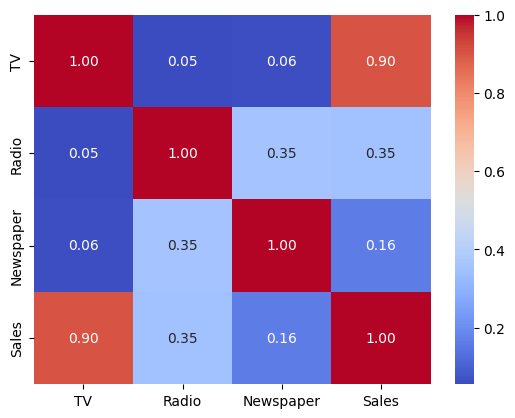

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

The correlation between radio advertising expenditure and product sales is positive correlation and the strengh of the correlation is 0.35

#3.	Which advertising medium has the highest impact on sales based on the dataset?

From the above correlation matrix, we can clearly see the highest correlation existing between TV and sales. Therefore **advertising through TV** has the highest impact on sales.

#4.	Plot a linear regression line that includes all variables (TV, Radio, Newspaper) to predict Sales, and visualize the model's predictions against the actual sales values.

In [ ]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

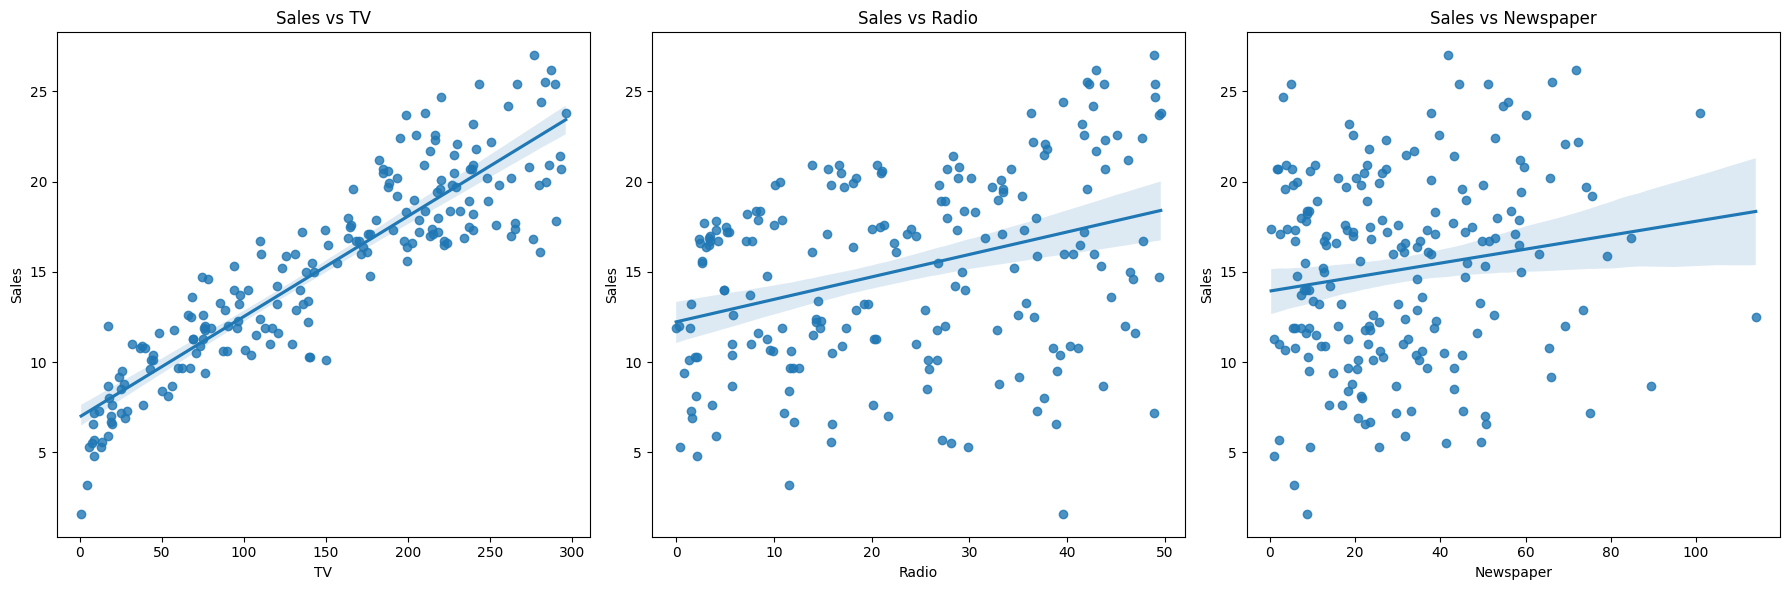

In [ ]:
# Visualize the relationship between each predictor and the dependent variable
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

predictors = ['TV', 'Radio', 'Newspaper']
for i, predictor in enumerate(predictors):
    sns.regplot(x=predictor, y='Sales', data=df, ax=axs[i])
    axs[i].set_title(f'Sales vs {predictor}')

plt.tight_layout()
plt.show()


In [ ]:
# Performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2.0186238976489776
R^2 Score: 0.89910282638328


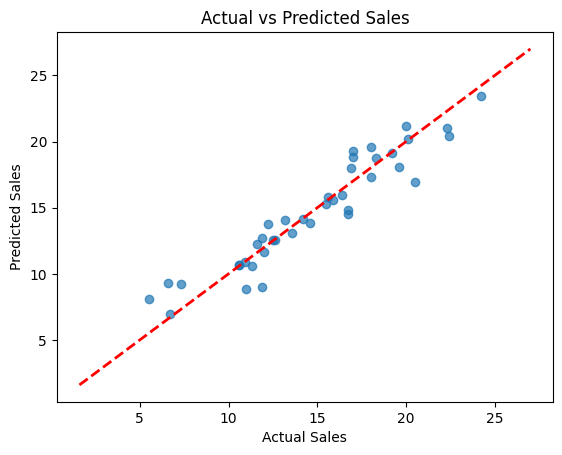

In [ ]:
# prediction values against the actual sales value
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # reference line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()

#5.	How would sales be predicted for a new set of advertising expenditures: $200 on TV, $40 on Radio, and $50 on Newspaper?

In [ ]:
print(regressor.predict([[200, 40, 50]]))

[19.8195841]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#6.	How does the performance of the linear regression model change when the dataset is normalized?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
regressor_scaled = LinearRegression()
regressor_scaled.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_scaled = regressor_scaled.predict(x_test_scaled)

In [ ]:
# Performance of the model
from sklearn.metrics import mean_squared_error, r2_score
mse_scaled = mean_squared_error(y_test, y_pred2)
r2_scaled = r2_score(y_test, y_pred2)
print(f'Mean Squared Error: {mse_scaled}')
print(f'R^2 Score: {r2_scaled}')

Mean Squared Error: 2.018623897648978
R^2 Score: 0.89910282638328


In [ ]:
# Print comparison results
print("Comparison of Model Performance:")
print(f"Original Data - MSE: {mse}, R^2: {r2}")
print(f"Normalized Data - MSE: {mse_scaled}, R^2: {r2_scaled}")


Comparison of Model Performance:
Original Data - MSE: 2.018623897648978, R^2: 0.89910282638328
Normalized Data - MSE: 2.018623897648978, R^2: 0.89910282638328


In [ ]:
print(y_pred - y_pred_scaled)

[-1.06581410e-14 -5.32907052e-15 -3.55271368e-15  3.55271368e-15
 -8.88178420e-15 -5.32907052e-15  0.00000000e+00 -1.77635684e-15
 -7.10542736e-15  7.10542736e-15  1.77635684e-15  7.10542736e-15
 -1.06581410e-14 -1.77635684e-15  0.00000000e+00 -3.55271368e-15
 -5.32907052e-15  1.77635684e-15 -1.06581410e-14 -7.10542736e-15
 -3.55271368e-15  0.00000000e+00  7.10542736e-15 -1.15463195e-14
  3.55271368e-15  3.55271368e-15  0.00000000e+00  7.10542736e-15
  0.00000000e+00  0.00000000e+00  3.55271368e-15 -3.55271368e-15
 -1.06581410e-14 -7.10542736e-15  7.10542736e-15  3.55271368e-15
  0.00000000e+00  1.77635684e-15  3.55271368e-15 -3.55271368e-15]



Normalization often improves the performance of a linear regression model, especially when the features have different scales. Since the values of the features are comparable i.e., the values are nearly same, we can see there is no much improvement in the performance of the model after normalization.

#7.	What is the impact on the sales prediction when only radio and newspaper advertising expenditures are used as predictors?

In [ ]:
x_new =df[['Radio', 'Newspaper']]
y_new = df['Sales']

In [ ]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new,y_new,test_size=0.2,random_state=42)
regressor_new = LinearRegression()
regressor_new.fit(x_train_new, y_train_new)

LinearRegression()

In [ ]:
y_pred_new = regressor_new.predict(x_test_new)

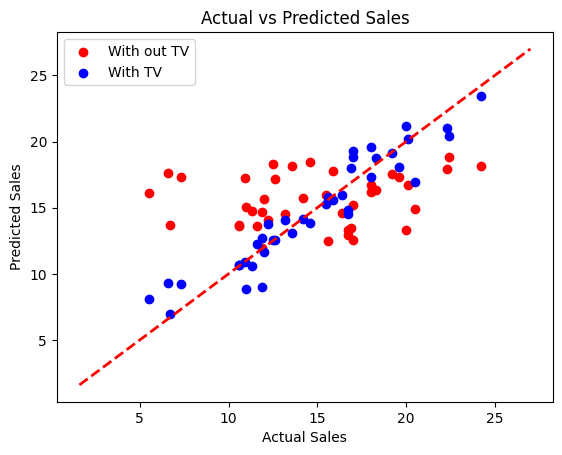

In [ ]:
plt.scatter(y_test_new, y_pred_new, c = 'red',label = 'With out TV')
plt.scatter(y_test,y_pred,c='blue', label = 'With TV')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2) # reference line
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

We can see the predicted sales values are more deviated from the original sales values if we predict the sales only using Radio and Newspaper.